# Colorbars

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np

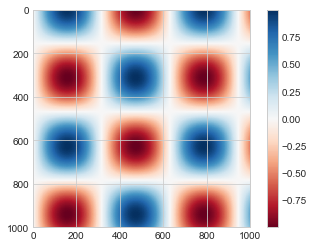

In [22]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='RdBu');
plt.colorbar();

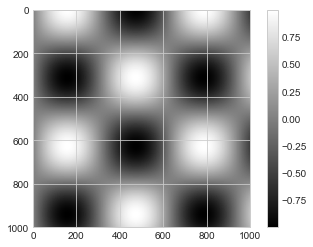

In [23]:
plt.imshow(I, cmap='gray');
plt.colorbar();

In [29]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    '''Return grayscale version of given colormap'''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA to perceived grayscale
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    '''plot a colormap with its grayscale equivalent'''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])
    

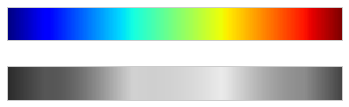

In [30]:
view_colormap('jet')  # This kinda sucks

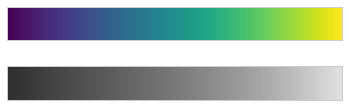

In [31]:
view_colormap('viridis')  # Use this to show continuously increasing quantities

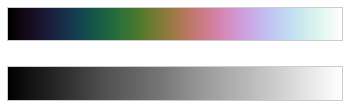

In [34]:
view_colormap('cubehelix')  # Another option for continuously increasing quantities, greater color range

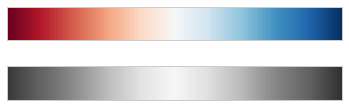

In [35]:
view_colormap('RdBu')  # Use this for showing positive/negative deviation from some mean

## Color limits, extensions

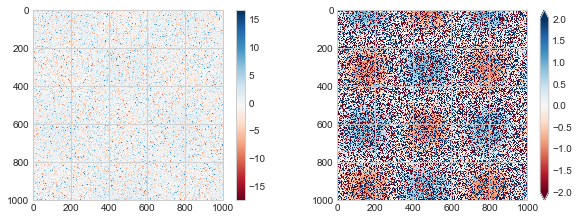

In [80]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 1, np.count_nonzero(speckles))

I[speckles].shape
I[speckles]

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-2, 2)

## Example: Handwritten Digits

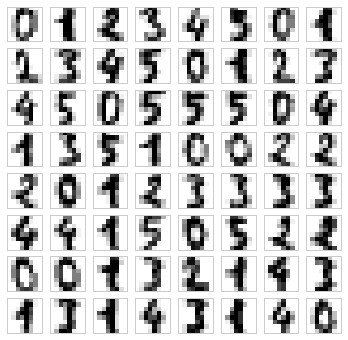

In [90]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [95]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

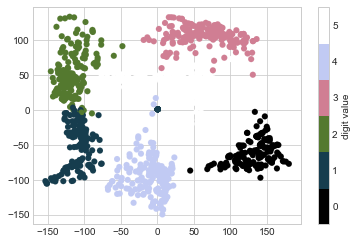

In [112]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, 
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)